In [3]:
%pylab inline
import pandas as pd
import seaborn as sns
import plotly.express as px

import plotly.io as pio
pio.renderers.default='iframe'
from plotly.subplots import make_subplots
import plotly.graph_objects as go

sns.set_style('whitegrid', {'grid.linestyle': u'--'})
matplotlib.rc('pdf', fonttype=42)

Populating the interactive namespace from numpy and matplotlib


In [4]:
meteo = pd.read_csv('Lichtenhain.csv',index_col=0)
meteo.index = pd.to_datetime(meteo.index)
meteo.head()

,T,Tmin,Tmax,Prec,RHmin,RHmax,u2,aP,Prec30h,Prec15
1991-03-05 06:00:00,1.6,1.6,1.6,NaN,86.0,86.0,NaN,1021.0,NaN,NaN
1991-03-05 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-05 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-05 09:00:00,2.2,2.2,2.2,NaN,86.0,86.0,NaN,1020.5,NaN,NaN
1991-03-05 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
meteox = meteo.resample('1W').agg({'T':'mean','Tmin':'min','Tmax':'max','Prec':'sum','RHmin':'min','RHmax':'max','u2':'mean','aP':'mean'})
meteox['Prec50'] = meteox['Prec']
meteox.loc[meteox['Prec50']<50.,'Prec50']=np.nan

meteo['Prec15h'] = meteo['Prec']
meteo.loc[meteo['Prec15h']<15.,'Prec15h']=np.nan



# set up plotly figure
fig = make_subplots(1,1)
fig.add_trace(go.Bar(x=meteox.index, y=meteox['Prec'], name='Prec', marker_color = 'steelblue', opacity=0.4))
fig.add_trace(go.Bar(x=meteox.index, y=meteox['Prec50'], name='Prec 50 l/w', marker_color = 'orange', opacity=0.9))
fig.add_trace(go.Bar(x=meteo.index, y=meteo['Prec30h'], name='Prec 30 l/h', marker_color = 'red', opacity=0.9))
#fig.add_trace(go.Scatter(x=meteox.index, y=meteox['T'], line=dict(color='red'), name='T'))
#fig.layout.update(yaxis2 = go.layout.YAxis(overlaying='y', side='right'))
#fig.add_trace(go.Scatter(x=ddx.index, y=ddx['Rad'], line=dict(color='orange'), name='Rad',yaxis='y2'))
fig.update_layout({'template': 'none'})
fig.show()

In [29]:
meteox.loc[meteox['Prec50']>=50.,'Prec50'].count()

42

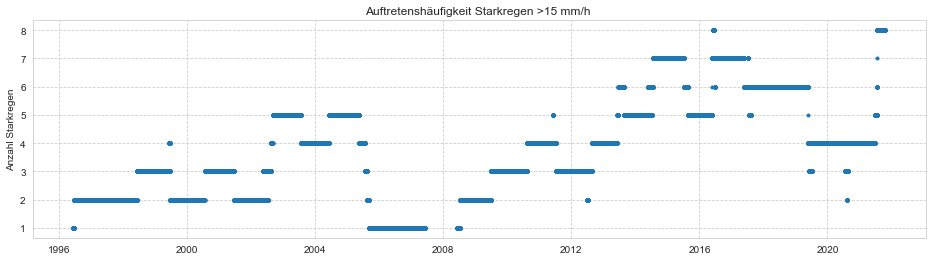

In [30]:
figsize(16,4)
meteo['Prec15'] = meteo['Prec30h']/meteo['Prec30h']
plot(meteo['Prec15'].rolling('1100D').sum(),'.')
title('Auftretenshäufigkeit Starkregen >15 mm/h ')
ylabel('Anzahl Starkregen')
savefig('strakregenx.png',bbox_inches='tight')

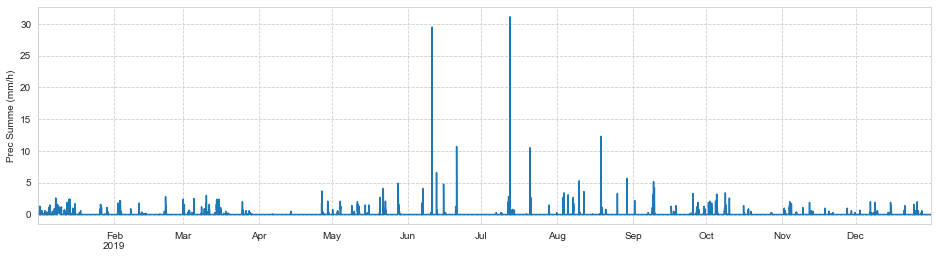

In [32]:
tst = pd.to_datetime('2019-01-01 01:00')
tnd = pd.to_datetime('2019-12-31 23:00')
meteo.loc[tst:tnd,'Prec'].plot()
ylabel('Prec (mm/h)')
#meteo.loc[tst:tnd,'Prec'].cumsum().plot(secondary_y=True)
ylabel('Prec Summe (mm/h)')
savefig('blablubb.png',bbox_inches='tight')
#savefig('blablubb.png',bbox_inches='tight')

<ipython-input-17-981a2ec9aadf>:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)

<ipython-input-17-981a2ec9aadf>:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)

<ipython-input-17-981a2ec9aadf>:7: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



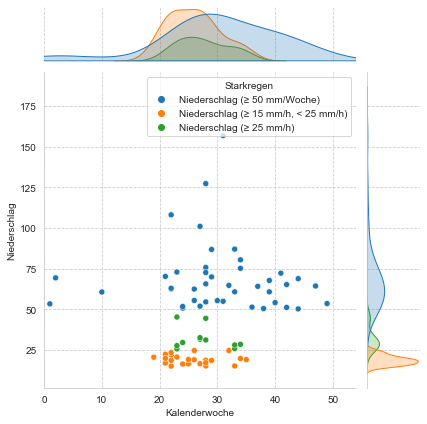

In [17]:
dummyx = pd.DataFrame([meteox.loc[meteox['Prec50']>=50.,'Prec50'].values,meteox.loc[meteox['Prec50']>=50.,'Prec50'].index.week.values]).T
dummyx.columns = ['Niederschlag','Kalenderwoche']
dummyx['Starkregen']='Niederschlag (≥ 50 mm/Woche)'
dummyx1 = pd.DataFrame([meteo.loc[(meteo['Prec']>=15.)&(meteo['Prec']<25.),'Prec'].values,meteo.loc[(meteo['Prec']>=15.)&(meteo['Prec']<25.),'Prec'].index.week.values]).T
dummyx1.columns=['Niederschlag','Kalenderwoche']
dummyx1['Starkregen']='Niederschlag (≥ 15 mm/h, < 25 mm/h)'
dummyx2 = pd.DataFrame([meteo.loc[meteo['Prec']>=25.,'Prec'].values,meteo.loc[meteo['Prec']>=25.,'Prec'].index.week.values]).T
dummyx2.columns=['Niederschlag','Kalenderwoche']
dummyx2['Starkregen']='Niederschlag (≥ 25 mm/h)'
dummyx3 = pd.concat([dummyx,dummyx1])
dummyx3 = pd.concat([dummyx3,dummyx2])
sns.jointplot(x=dummyx3['Kalenderwoche'],y=dummyx3['Niederschlag'],hue=dummyx3['Starkregen'],xlim=[0,54])
savefig('starkregenalle.png',bbox_inches='tight')


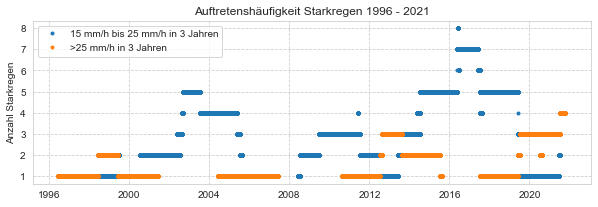

In [19]:
figsize(10,3)
meteo['Prec15'] = meteo.loc[(meteo['Prec']>=15.)&(meteo['Prec']<25.),'Prec']
meteo['Prec25'] = meteo.loc[meteo['Prec']>=25.,'Prec']
meteo['Prec15x'] = meteo['Prec15']/meteo['Prec15']
meteo['Prec25x'] = meteo['Prec25']/meteo['Prec25']
plot(meteo['Prec15x'].rolling('1100D').sum(),'.',label='15 mm/h bis 25 mm/h in 3 Jahren')
plot(meteo['Prec25x'].rolling('1100D').sum(),'.',label='>25 mm/h in 3 Jahren')
title('Auftretenshäufigkeit Starkregen 1996 - 2021')
ylabel('Anzahl Starkregen')
legend()
savefig('strakregenx.png',bbox_inches='tight')
